
# <p style="text-align: center;">MIS382: Advanced Predictive Modeling</p>
# <p style="text-align: center;">Assignment 5</p>
## <p style="text-align: center;">Total points: 35</p>
## <p style="text-align: center;">Due: Monday, November 27th, submitted via Canvas by 11:59 pm</p>

Your homework should be written in a **Jupyter notebook**. You may work in groups of two if you wish. Only one student per team needs to submit the assignment on Canvas.  But be sure to include name and UTID for both students.  Homework groups will be created and managed through Canvas, so please do not arbitrarily change your homework group.  

Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting. (%matplotlib inline)

# Question 1: Ensembles (1+12+2 = 15pts)
In this question, we will compare performance of different ensemble methods: [Random Forest](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html), [Gradient Boosting Decision Tree](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html) (GBDT), and [XGBoost](http://xgboost.readthedocs.io/en/latest/).  Note that you have to install xgboost package in addition to scikit-learn.  You can see installation guides [here](http://xgboost.readthedocs.io/en/latest/build.html).




Two  datasets are provided for this problem. For **each of the datasets ((X1.csv, y1.csv), (X2.csv, y2.csv))**, do the following:

1. Load the data and partition it into features (X) and the target label (y) for classification task. Then, use [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) to split data into training and testing: test_size=0.33, random_state=42.

2. Build a classifier using [Random Forest](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html), [Gradient Boosting Decision Tree](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html), and [XGBoost](http://xgboost.readthedocs.io/en/latest/), respectively, and answer the following for each classifier.

 - Mention any design choices (with reasoning/justification) that you made, e.g. the hyperparameters considered for each classifier.
 - Report the mean error rate (fraction of incorrect labels) and the confusion matrix on test data. <br>
 - Report the feature importance and time of execution (training and predicting times).

3. Compare the three classifiers for the two different datasets ((X1.csv, y1.csv), (X2.csv, y2.csv)) in terms of the misclassification rate.  What are the characteristics of the dataset and the classifiers that resulted in somewhat different comparative results?

In [1]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from xgboost.sklearn import XGBClassifier
from time import time
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

## Solution

### 1.

In [2]:
import pandas as pd
X1 = pd.read_csv('hmk5_data/X1.csv',header=None)
X2 = pd.read_csv('hmk5_data/X2.csv',header=None)
y1 = pd.read_csv('hmk5_data/y1.csv',header=None, squeeze=True)
y2 = pd.read_csv('hmk5_data/y2.csv',header=None, squeeze=True)

In [3]:
X1.shape

(10000, 30)

In [4]:
X2.shape

(5000, 20)

In [5]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.33, random_state=42)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.33, random_state=42)

### 2.

### Parameter Tuning (Grid Search)

#### Random Forest
- number of trees (n_estimators)
- maximum number of features at each split (max_features)

For this model, we decided to consider n_estimators (the total number of trees we grow) and max_features(the number of predictors considered at each split) as they are often the most important ones. We only consider these two because the run time will grow exponentially with grid search.
n_estimators controls how many trees we are averaging over. This higher the value of this parameters the lower the variance is but we might run the risk of overfitting. max_features makes sure that each tree we grow are not highly correlated. We also consider None which makes random forest bagging.

In [6]:
clf_rf = RandomForestClassifier()
n_estimators = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
max_features = ['sqrt', 'log2', None]
param_grid = dict(max_features=max_features, n_estimators=n_estimators)
grid_search_rf = GridSearchCV(clf_rf, param_grid, scoring="accuracy", n_jobs=-1)

grid_search_rf.fit(X1_train, y1_train)
rf1_max_features = grid_search_rf.best_params_['max_features']
rf1_n_estimators = grid_search_rf.best_params_['n_estimators']

grid_search_rf.fit(X2_train, y2_train)
rf2_max_features = grid_search_rf.best_params_['max_features']
rf2_n_estimators = grid_search_rf.best_params_['n_estimators']

#### Gradient Boosting
- number of trees (n_estimators)
- learning rate of each weak learner (learning_rate)

For this model, we decided to consider n_estimators (the total number of trees we grow) and learning rate as they are often the most important ones. We only consider these two because the run time will grow exponentially with grid search.
n_estimators controls how many trees we are sequentially. learning rate controls how much we weigh new answer at each step.

In [8]:
clf_gb = GradientBoostingClassifier()
n_estimators = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
learning_rate = [0.0001, 0.001, 0.01, 0.1, 1]
param_grid = dict(learning_rate=learning_rate, n_estimators=n_estimators)
grid_search_gb = GridSearchCV(clf_gb, param_grid, scoring="accuracy", n_jobs=-1)

grid_search_gb.fit(X1_train, y1_train)
gb1_learning_rate = grid_search_gb.best_params_['learning_rate']
gb1_n_estimators = grid_search_gb.best_params_['n_estimators']

grid_search_gb.fit(X2_train, y2_train)
gb2_learning_rate = grid_search_gb.best_params_['learning_rate']
gb2_n_estimators = grid_search_gb.best_params_['n_estimators']

#### XGBoost
- number of trees (n_estimators)
- learning rate of each weak learner (learning_rate)
- L2 regularization (reg_lambda)

For this model, we decided to consider n_estimators (the total number of trees we grow), learning rate, and lmbda for regularization term as they are often the most important ones. We only consider these three because the run time will grow exponentially with grid search.
n_estimators controls how many trees we are sequentially. learning rate controls how much we weigh new answer at each step. lambda controls how much we penalize model complexity.

In [9]:
clf_xgb = XGBClassifier()
n_estimators = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
learning_rate = [0.0001, 0.001, 0.01, 0.1, 1]
reg_lambda = [0.001, 0.01, 0.1, 1, 10]
param_grid = dict(learning_rate=learning_rate, n_estimators=n_estimators, reg_lambda=reg_lambda)
grid_search_xgb = GridSearchCV(clf_xgb, param_grid, scoring="accuracy", n_jobs=-1)

grid_search_xgb.fit(X1_train, y1_train)
xgb1_learning_rate = grid_search_xgb.best_params_['learning_rate']
xgb1_n_estimators = grid_search_xgb.best_params_['n_estimators']
xgb1_reg_lambda = grid_search_xgb.best_params_['reg_lambda']

grid_search_xgb.fit(X2_train, y2_train)
xgb2_learning_rate = grid_search_xgb.best_params_['learning_rate']
xgb2_n_estimators = grid_search_xgb.best_params_['n_estimators']
xgb2_reg_lambda = grid_search_xgb.best_params_['reg_lambda']

### Fitting Best Parameters

### Dataset 1

In [12]:
clf_rf1 = RandomForestClassifier(n_estimators=rf1_n_estimators, max_features = rf1_max_features, random_state=42)

start_time = time()
clf_rf1.fit(X1_train, y1_train)
print ('training time of random forest on dataset 1: %s seconds\n'%(time() - start_time))

start_time = time()
y1_pred_rf = clf_rf1.predict(X1_test)
print ('predicting time of random forest on dataset 1: %s seconds\n'%(time() - start_time))

confusion_rf1 = confusion_matrix(y1_test, y1_pred_rf)
print 'confusion matrix of random forest on dataset 1:\n',confusion_rf1,'\n'

accuracy_rf1 = accuracy_score(y1_test, y1_pred_rf)
print 'mean error rate of random forest on dataset 1: %f \n'%(1-accuracy_rf1)

print 'feature importance: \n',clf_rf1.feature_importances_

training time of random forest on dataset 1: 15.7690320015 seconds

predicting time of random forest on dataset 1: 0.0454540252686 seconds

confusion matrix of random forest on dataset 1:
[[1522  159]
 [ 114 1505]] 

mean error rate of random forest on dataset 1: 0.082727 

feature importance: 
[ 0.067711    0.00820885  0.00803714  0.00828683  0.00813844  0.0069428
  0.00717046  0.00887062  0.00764386  0.00755607  0.00792138  0.00788157
  0.008237    0.00677926  0.0086914   0.00773247  0.00825542  0.00723936
  0.12367512  0.00710047  0.00746286  0.10287714  0.50329674  0.00651846
  0.00765052  0.00738214  0.0082105   0.00828909  0.00721031  0.00902271]


In [13]:
clf_gb1 = GradientBoostingClassifier(n_estimators=gb1_n_estimators, learning_rate = gb1_learning_rate, random_state=42)

start_time = time()
clf_gb1.fit(X1_train, y1_train)
print ('training time of gradient boosting trees on dataset 1: %s seconds\n'%(time() - start_time))

start_time = time()
y1_pred_gb = clf_gb1.predict(X1_test)
print ('predicting time of gradient boosting trees on dataset 1: %s seconds\n'%(time() - start_time))

confusion_gb1 = confusion_matrix(y1_test, y1_pred_gb)
print 'confusion matrix of gradient boosting trees on dataset 1:\n',confusion_gb1,'\n'

accuracy_gb1 = accuracy_score(y1_test, y1_pred_gb)
print 'mean error rate of gradient boosting trees on dataset 1: %f \n'%(1-accuracy_gb1)

print 'feature importance: \n',clf_gb1.feature_importances_

training time of gradient boosting trees on dataset 1: 14.727380991 seconds

predicting time of gradient boosting trees on dataset 1: 0.0361180305481 seconds

confusion matrix of gradient boosting trees on dataset 1:
[[1501  180]
 [ 140 1479]] 

mean error rate of gradient boosting trees on dataset 1: 0.096970 

feature importance: 
[ 0.05870035  0.01758636  0.02701878  0.02924306  0.02895469  0.02694526
  0.03364211  0.03446771  0.02040636  0.02884781  0.02364472  0.02412234
  0.03464724  0.02107804  0.02857875  0.02479733  0.02954515  0.02891029
  0.06274839  0.02330657  0.02675175  0.07525014  0.09109411  0.02563427
  0.03326589  0.02915485  0.02504815  0.02527679  0.02587423  0.03545853]


In [14]:
clf_xgb1 = XGBClassifier(n_estimators=xgb1_n_estimators, learning_rate=xgb1_learning_rate, reg_lambda= xgb1_reg_lambda, random_state=42)

start_time = time()
clf_xgb1.fit(X1_train, y1_train)
print ('training time of XGBoost trees on dataset 1: %s seconds\n'%(time() - start_time))

start_time = time()
y1_pred_xgb = clf_xgb1.predict(X1_test)
print ('predicting time of XGBoost trees on dataset 1: %s seconds\n'%(time() - start_time))

confusion_xgb1 = confusion_matrix(y1_test, y1_pred_xgb)
print 'confusion matrix of XGBoost trees on dataset 1:\n',confusion_xgb1,'\n'

accuracy_xgb1 = accuracy_score(y1_test, y1_pred_xgb)
print 'mean error rate of XGBoost trees on dataset 1: %f \n'%(1-accuracy_xgb1)

print 'feature importance: \n',clf_xgb1.feature_importances_

training time of XGBoost trees on dataset 1: 9.59928297997 seconds

predicting time of XGBoost trees on dataset 1: 0.0878031253815 seconds

confusion matrix of XGBoost trees on dataset 1:
[[1517  164]
 [ 149 1470]] 

mean error rate of XGBoost trees on dataset 1: 0.094848 

feature importance: 
[ 0.08347245  0.02647269  0.02361078  0.02981159  0.01931791  0.03100405
  0.02337229  0.03577391  0.01192464  0.03076556  0.01287861  0.02647269
  0.03076556  0.02456475  0.02051037  0.03100405  0.01550203  0.02194133
  0.10112092  0.01836394  0.02122585  0.08204149  0.09348915  0.02671118
  0.03005008  0.0326735   0.02814214  0.01884093  0.02170284  0.02647269]


### Dataset 2

In [16]:
clf_rf2 = RandomForestClassifier(n_estimators=rf2_n_estimators, max_features = rf2_max_features, random_state=42)

start_time = time()
clf_rf2.fit(X2_train, y2_train)
print ('training time of random forest on dataset 1: %s seconds\n'%(time() - start_time))

start_time = time()
y2_pred_rf = clf_rf2.predict(X2_test)
print ('predicting time of random forest on dataset 1: %s seconds\n'%(time() - start_time))

confusion_rf2 = confusion_matrix(y2_test, y2_pred_rf)
print 'confusion matrix of random forest on dataset 1:\n',confusion_rf2,'\n'

accuracy_rf2 = accuracy_score(y2_test, y2_pred_rf)
print 'mean error rate of random forest on dataset 1: %f \n'%(1-accuracy_rf2)

print 'feature importance: \n',clf_rf2.feature_importances_

training time of random forest on dataset 1: 11.5927700996 seconds

predicting time of random forest on dataset 1: 0.282898902893 seconds

confusion matrix of random forest on dataset 1:
[[784  66]
 [ 35 765]] 

mean error rate of random forest on dataset 1: 0.061212 

feature importance: 
[ 0.02896598  0.01699222  0.01619105  0.05564484  0.05335792  0.0591138
  0.04776768  0.056298    0.04464193  0.14732021  0.03613252  0.08334729
  0.01564104  0.06610192  0.01624294  0.06865922  0.05177554  0.0165388
  0.07981951  0.03944759]


In [17]:
clf_gb2 = GradientBoostingClassifier(n_estimators=gb2_n_estimators, learning_rate = gb2_learning_rate, random_state=42)

start_time = time()
clf_gb2.fit(X2_train, y2_train)
print ('training time of gradient boosting trees on dataset 1: %s seconds\n'%(time() - start_time))

start_time = time()
y2_pred_gb = clf_gb2.predict(X2_test)
print ('predicting time of gradient boosting trees on dataset 1: %s seconds\n'%(time() - start_time))

confusion_gb2 = confusion_matrix(y2_test, y2_pred_gb)
print 'confusion matrix of gradient boosting trees on dataset 1:\n',confusion_gb2,'\n'

accuracy_gb2 = accuracy_score(y2_test, y2_pred_gb)
print 'mean error rate of gradient boosting trees on dataset 1: %f \n'%(1-accuracy_gb2)

print 'feature importance: \n',clf_gb2.feature_importances_

training time of gradient boosting trees on dataset 1: 6.91613197327 seconds

predicting time of gradient boosting trees on dataset 1: 0.0269589424133 seconds

confusion matrix of gradient boosting trees on dataset 1:
[[789  61]
 [ 32 768]] 

mean error rate of gradient boosting trees on dataset 1: 0.056364 

feature importance: 
[ 0.05023569  0.03233285  0.02711576  0.06076263  0.06392185  0.0493846
  0.04616338  0.06888047  0.05050592  0.06261749  0.05139005  0.06374118
  0.0189308   0.05205927  0.02334054  0.07044721  0.05719396  0.02692915
  0.07315506  0.05089214]


In [18]:
clf_xgb2 = XGBClassifier(n_estimators=xgb2_n_estimators, learning_rate=xgb2_learning_rate, reg_lambda= xgb2_reg_lambda, random_state=42)

start_time = time()
clf_xgb2.fit(X2_train, y2_train)
print ('training time of XGBoost trees on dataset 1: %s seconds\n'%(time() - start_time))

start_time = time()
y2_pred_xgb = clf_xgb2.predict(X2_test)
print ('predicting time of XGBoost trees on dataset 1: %s seconds\n'%(time() - start_time))

confusion_xgb2 = confusion_matrix(y2_test, y2_pred_xgb)
print 'confusion matrix of XGBoost trees on dataset 1:\n',confusion_xgb2,'\n'

accuracy_xgb2 = accuracy_score(y2_test, y2_pred_xgb)
print 'mean error rate of XGBoost trees on dataset 1: %f \n'%(1-accuracy_xgb2)

print 'feature importance: \n',clf_xgb2.feature_importances_

training time of XGBoost trees on dataset 1: 5.32443881035 seconds

predicting time of XGBoost trees on dataset 1: 0.0566861629486 seconds

confusion matrix of XGBoost trees on dataset 1:
[[796  54]
 [ 29 771]] 

mean error rate of XGBoost trees on dataset 1: 0.050303 

feature importance: 
[ 0.04592086  0.02475167  0.02442599  0.06008793  0.06171633  0.05959941
  0.0517831   0.05406285  0.06008793  0.06513597  0.05113174  0.06204201
  0.02621723  0.05194594  0.02898551  0.06936981  0.06367041  0.02572871
  0.06676437  0.04657222]


### 3.

For dataset 1, random forest has the lowest mean error rate; for dataset 2, XGBoost has the lowest mean error rate. Dataset 1 has relatively more data points against features comparing to dataset 2, which allows for more complex model. Data set 2 also has higher variance for each variable.

Each tree in the random forest fits the entire dataset indepedently, allowing the model to capture the information in the dataset 1 more comprehensively. XGBoost has regularization term in the cost function, which prevent the model from overfitting in dataset 2. Also, since we add regularization term, this parameter also controls the variance of our model, which helps reduce the total error.

# Question 2: Visualization using Bokeh (10 pts)

In this problem, you'll build an interactive visualization. Bokeh is a Python interactive visualization library that targets modern web browsers for presentation. For more information on Bokeh, see http://bokeh.pydata.org/en/latest/. The problem statement is as follows:

Using the "nbasalariesfull.csv" data set from HMK4, your goal is to build a Bokeh visualization which allows the user to explore how salary (on a log scale) varies with points per game (PSG) and age. You will create a visualization that allows the user to toggle the X axis of a scatter plot between PSG and age, with the y-axis always being log Salary. Also add the hover tool so that if the user hovers over a datapoint in the plot a window pops up that shows the player name, team, position, salary, and the current x variable (PSG or age) depending on the current tab.  Color each point according to a player's position and provide a legend for the colors. Add the ability to Zoom in/out.  Add slight horizontal jitter to a player's age.

Hints: 
1. see: http://bokeh.pydata.org/en/latest/docs/user_guide/tools.html#basic-tooltips for hover and zoom tool examples.
2. See: http://bokeh.pydata.org/en/latest/docs/reference/plotting.html. Look for the scatter API.
3. See: http://bokeh.pydata.org/en/0.10.0/docs/user_guide/styling.html#labels. For labeling axes.
4. See: https://bokeh.pydata.org/en/latest/docs/user_guide/categorical.html  for how to use jitter transform
5. See: http://bokeh.pydata.org/en/latest/docs/gallery/iris.html for coloring points by category
6. Use output_notebook() from Bokeh to output the plot to your notebook

Include an image screenshot in addition to the visualization output.

In [19]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from bokeh.models.widgets import Panel, Tabs
from bokeh.palettes import Spectral6
from bokeh.models import CustomJS, ColumnDataSource, HoverTool, BoxZoomTool
from bokeh.transform import jitter, factor_cmap
from bokeh.plotting import figure, output_notebook, show

data = pd.read_csv("hmk5_data/nbasalariesfull.csv")
data["logsalary"] = data.SALARY.apply(np.log)

## Solution

In [27]:
output_notebook()

source = ColumnDataSource(data)

hover1 = HoverTool(tooltips=[
    ("Name", "@Player"),
    ("Team", "@Tm"),
    ("Position", "@Pos"),
    ("Salary", "@SALARY"),
    ("PSG","@PSG")
])

hover2 = HoverTool(tooltips=[
    ("Name", "@Player"),
    ("Team", "@Tm"),
    ("Position", "@Pos"),
    ("Salary", "@SALARY"),
    ("Age","@Age")
])

colors = factor_cmap("Pos", palette=Spectral6, factors = data.Pos.unique())


p1 = figure(plot_width=500, plot_height=500, tools=[hover1, BoxZoomTool()],
           title="Salaries of NBA Players vs PSG")
p1.scatter(x='PSG', y='logsalary', size=6, color = colors, source=source, legend = "Pos")
p1.xaxis.axis_label = "PSG"
p1.yaxis.axis_label = "Log Salary"
p1.legend.location ="bottom_right"
tab1 = Panel(child=p1, title="PSG")


p2 = figure(plot_width=500, plot_height=500, tools=[hover2, BoxZoomTool()],
           title="Salaries of NBA Players vs Age")
p2.scatter(x=jitter('Age', width=0.6, range=p2.x_range), y='logsalary', size=6, color = colors, source=source, legend = "Pos")
p2.xaxis.axis_label = "Age"
p2.yaxis.axis_label = "Log Salary"
p2.legend.location ="bottom_right"
tab2 = Panel(child=p2, title="Age")

tabs = Tabs(tabs=[ tab1, tab2 ])

show(tabs)

Loading BokehJS ...

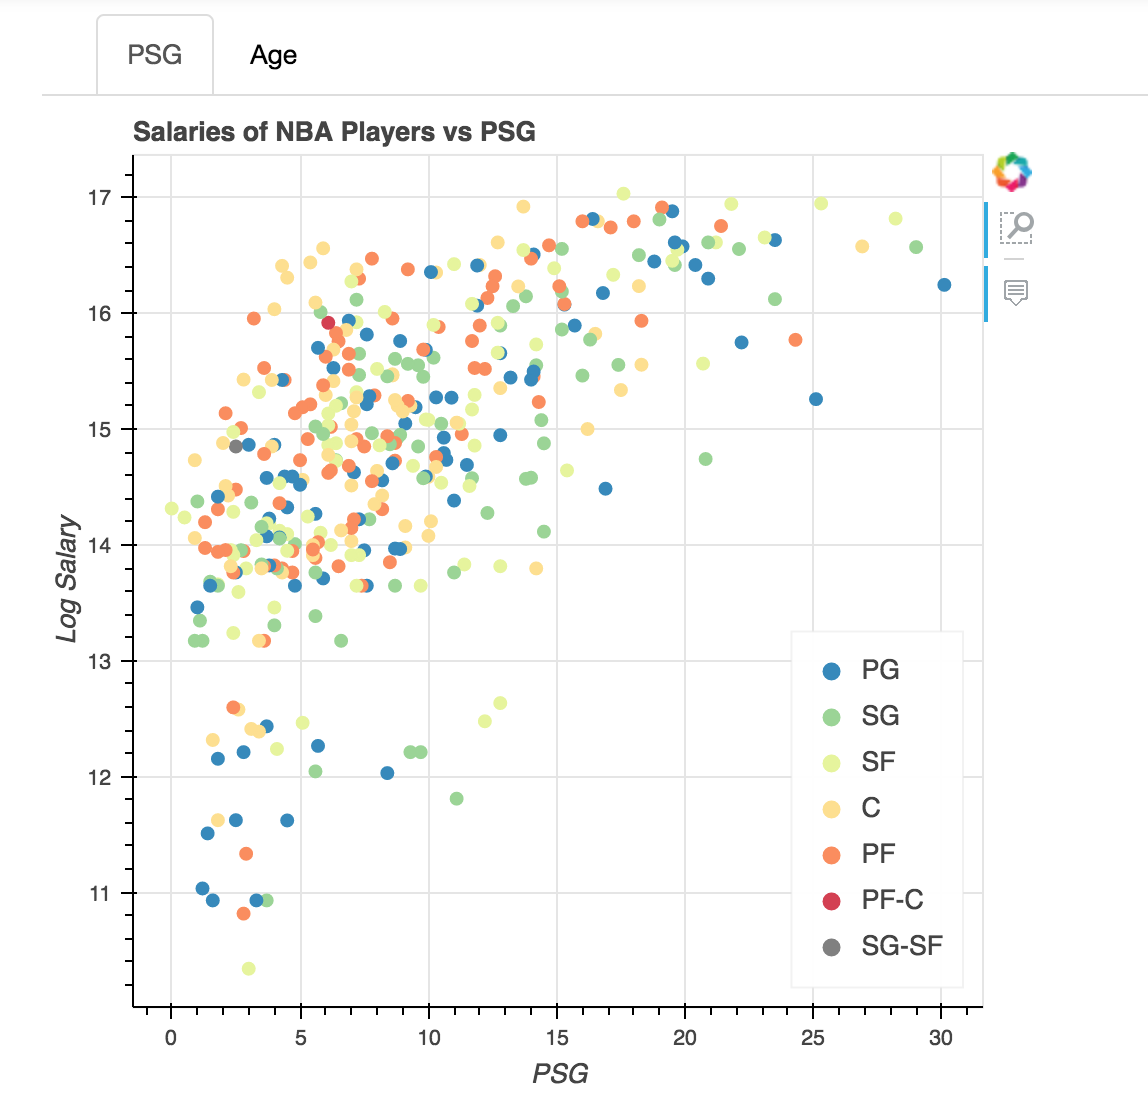

In [28]:
from IPython.display import Image
Image("q2.png",embed = True, width = 500, height = 500)

# Question 3: Diabetes classification using support vector machines (4+3+3=10 pts) 
(a) Apply a linear SVM, using the scikit-SVM, for the Pima Indian Women diabetes detection problem on the dataset provided (details on dataset here  http://archive.ics.uci.edu/ml/datasets/Pima+Indians+Diabetes) . Specify how you chose the slack cost/penalty (‘C’ parameter)for the model. Maintain all other parameters as default. Hint: http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.GridSearchCV.html will make 10-fold cross-validation easier.
The code to get the training/testing data is provided below.

(b) Repeat (a) but using a Gaussian radial basis kernel.

(c) Summarize the comparative performance (mean error rates) of the classifiers. What do you conclude? (be brief).

In [23]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn import grid_search

data_train = pd.read_csv('hmk5_data/diabetes_train-log.csv')
data_test = pd.read_csv('hmk5_data/diabetes_test-log.csv')
cols = ['numpreg', 'plasmacon', 'bloodpress', 'skinfold', 'seruminsulin', 'BMI', 'pedigreefunction', 'age']

xtrain = np.asmatrix(data_train[cols])
ytrain = np.asarray(data_train['classvariable']).T

xtest = np.asmatrix(data_test[cols])
ytest = np.asarray(data_test['classvariable']).T

## SOLUTION

### (a)

In [24]:
clf_svc = SVC(kernel = 'linear')
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
grid_search_svc1 = GridSearchCV(clf_svc, param_grid, n_jobs=-1, cv=10)             
grid_search_svc1.fit(xtrain, ytrain)
best_C1 = grid_search_svc1.best_params_['C']
              
clf_svc1 = SVC(kernel = 'linear', C = best_C1)
clf_svc1.fit(xtrain, ytrain)
y_pred1 = clf_svc1.predict(xtest)

### (b)

In [25]:
clf_svc = SVC(kernel = 'rbf')
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
grid_search_svc2 = GridSearchCV(clf_svc, param_grid, n_jobs=-1, cv=10)             
grid_search_svc2.fit(xtrain, ytrain)
best_C2 = grid_search_svc2.best_params_['C']
              
clf_svc2 = SVC(kernel = 'rbf', C = best_C2)
clf_svc2.fit(xtrain, ytrain)
y_pred2 = clf_svc2.predict(xtest)

### (c)

In [26]:
accuracy_svc1 = accuracy_score(ytest, y_pred1)
print 'mean error rate of SVC with linear kernel: %f \n'%(1-accuracy_svc1)

accuracy_svc2 = accuracy_score(ytest, y_pred2)
print 'mean error rate of SVC with RBF kernel: %f \n'%(1-accuracy_svc2)

mean error rate of SVC with linear kernel: 0.201681 

mean error rate of SVC with RBF kernel: 0.226891 



Linear SVC has lower mean error rate comparing to SVC with RBF kernel. The decision boundary of the data is more likely to be linear RBF kernel. Since we only have 400 data points RBF might be overfitting the data.